In [54]:
import polars as pl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os



survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower








sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

In [55]:
df=pd.read_csv("mytrain.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.shape


(891, 12)

In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
age=df["Age"].fillna(df['Age'].mean)

df['Age']=pd.to_numeric(df['Age'])

df=df.dropna()



In [60]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
df=df.drop(['Cabin','Name',"Ticket",'PassengerId'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 12.9+ KB


In [63]:
df.nunique()

Survived     2
Pclass       3
Sex          2
Age         63
SibSp        4
Parch        4
Fare        93
Embarked     3
dtype: int64

In [64]:
print("gender unique variable name: ", df["Sex"].unique())
print("surview unique variable name 1 for survived , 0 deceased: ", df["Survived"].unique())


gender unique variable name:  ['female' 'male']
surview unique variable name 1 for survived , 0 deceased:  [1 0]


C:\Users\USER\AppData\Local\Temp\ipykernel_5088\2992692507.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<AxesSubplot: xlabel='Age', ylabel='Count'>

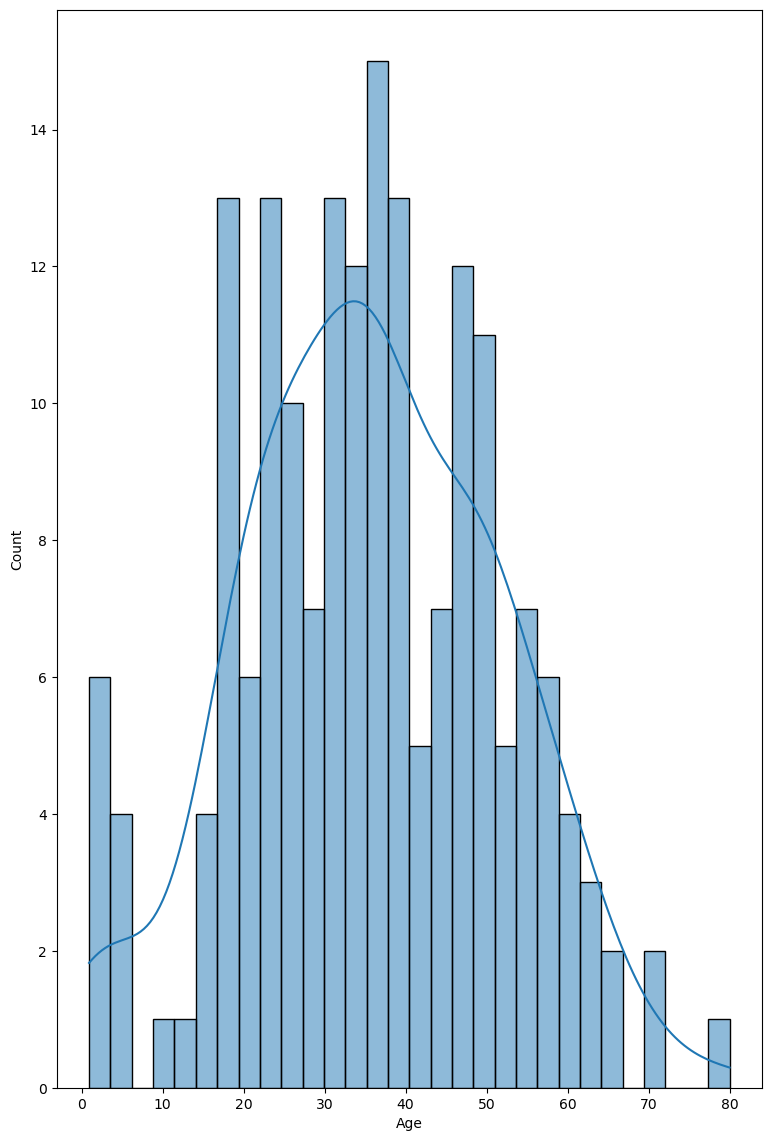

In [65]:
fig,axe=plt.subplots(2,1,figsize=(20,14))
plt.subplot(1,2,1)
sns.histplot(data=df,x="Age",bins=30,kde=True)



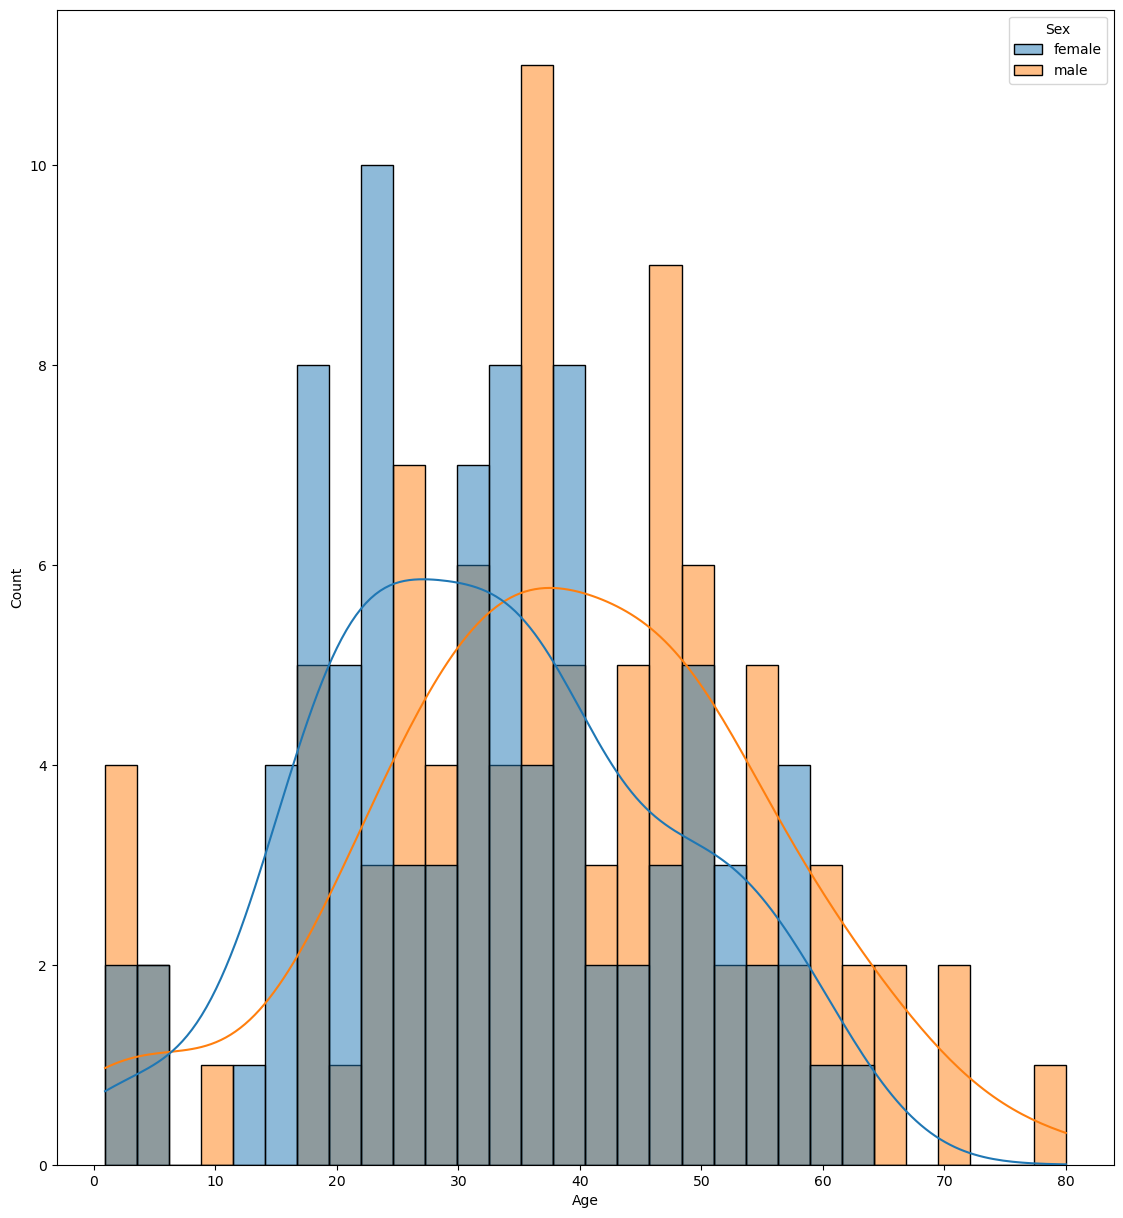

In [66]:
plt.subplot(1,2,2)
sns.histplot(data=df,x="Age",bins=30,hue="Sex",kde=True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5088\827303458.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\USER\AppData\Local\Temp\ipykernel_5088\827303458.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


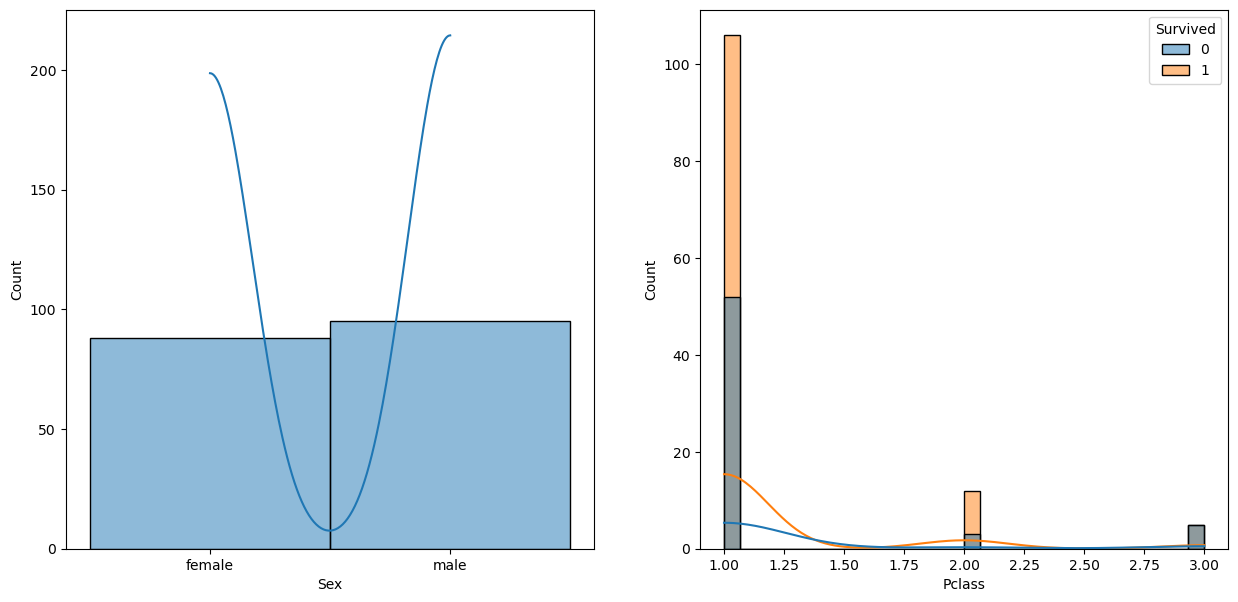

In [67]:
fig,axe=plt.subplots(2,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="Sex",bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x="Pclass",bins=30,hue="Survived",kde=True)

plt.show()

<AxesSubplot: xlabel='Fare', ylabel='Count'>

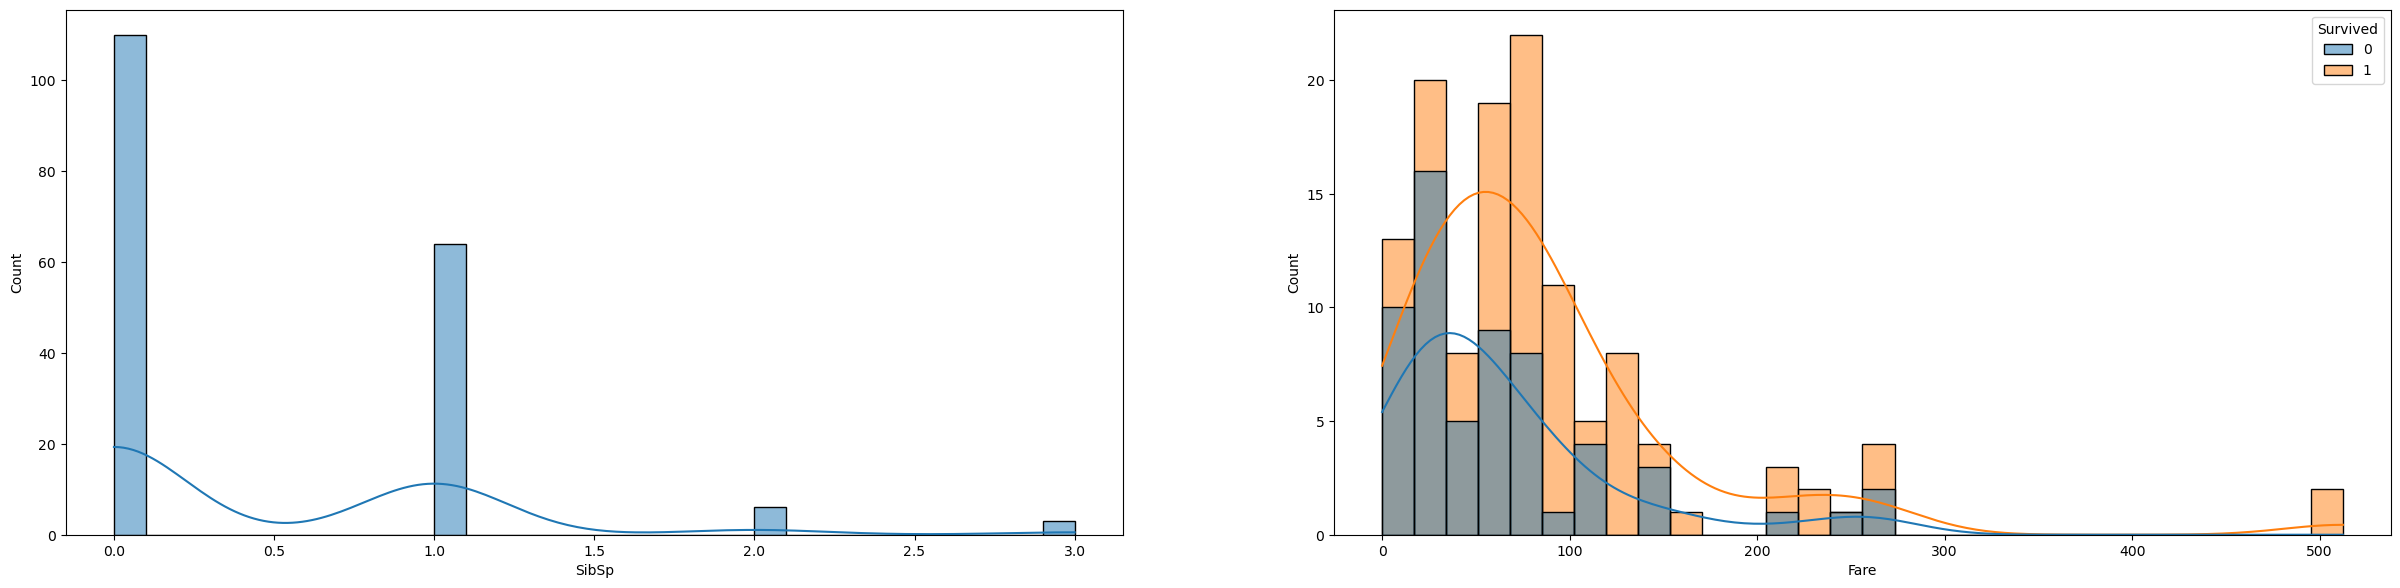

In [68]:
plt.subplot(2,2,1)
sns.histplot(data=df,x="SibSp",bins=30,kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df,x="Fare",bins=30,hue="Survived",kde=True)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

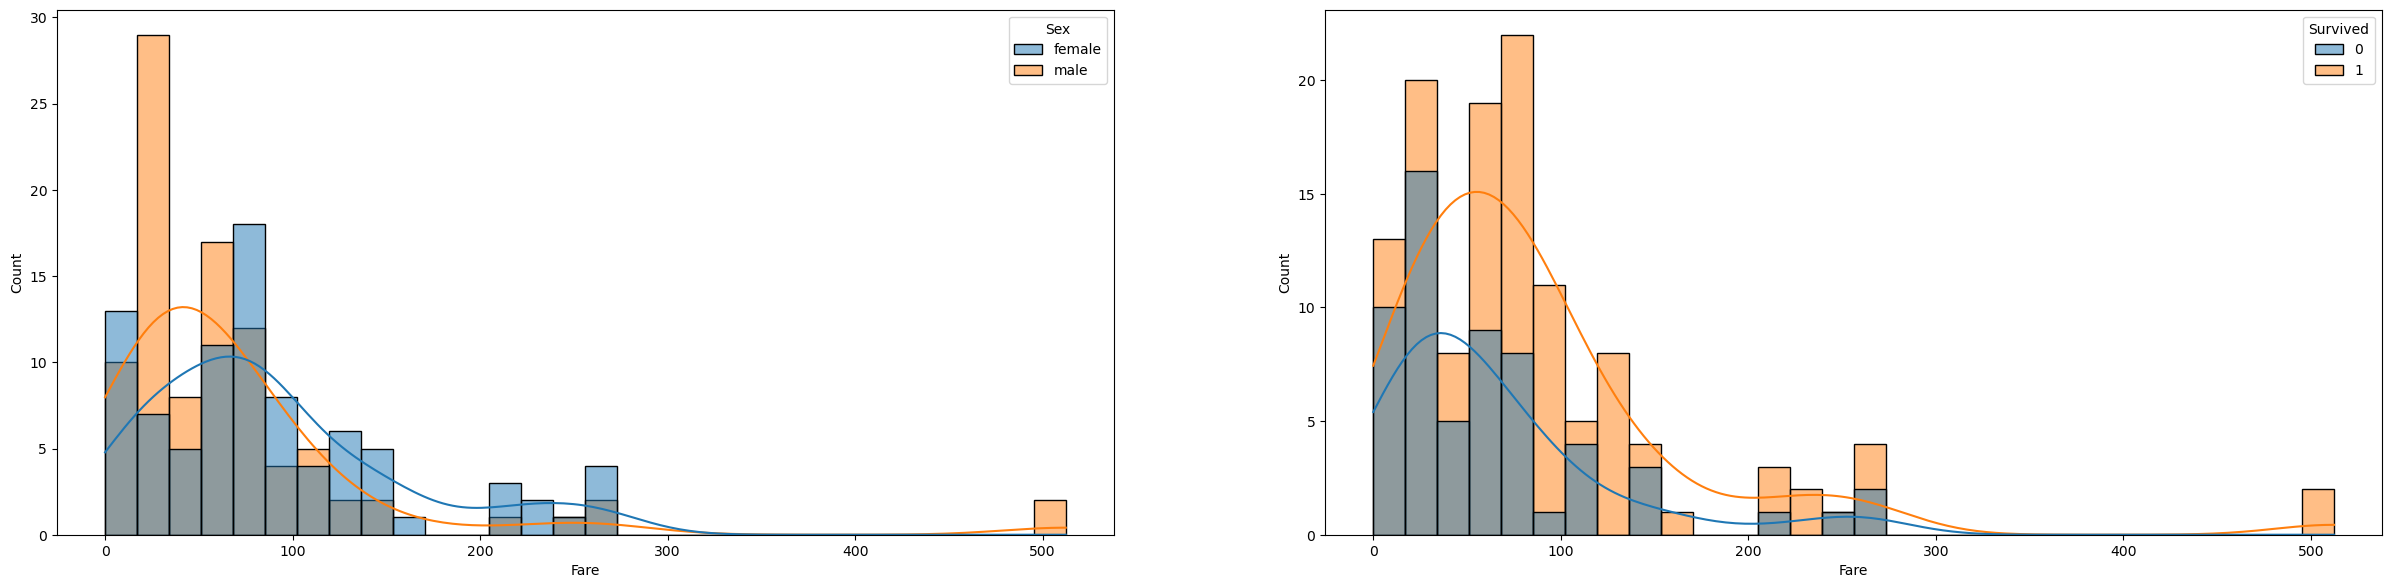

In [69]:
plt.subplot(2,2,1)
sns.histplot(data=df,x="Fare",bins=30,hue="Sex",kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df,x="Fare",bins=30,hue="Survived",kde=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_5088\712092394.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


<AxesSubplot: title={'center': 'Age Distribution'}, xlabel='Age'>

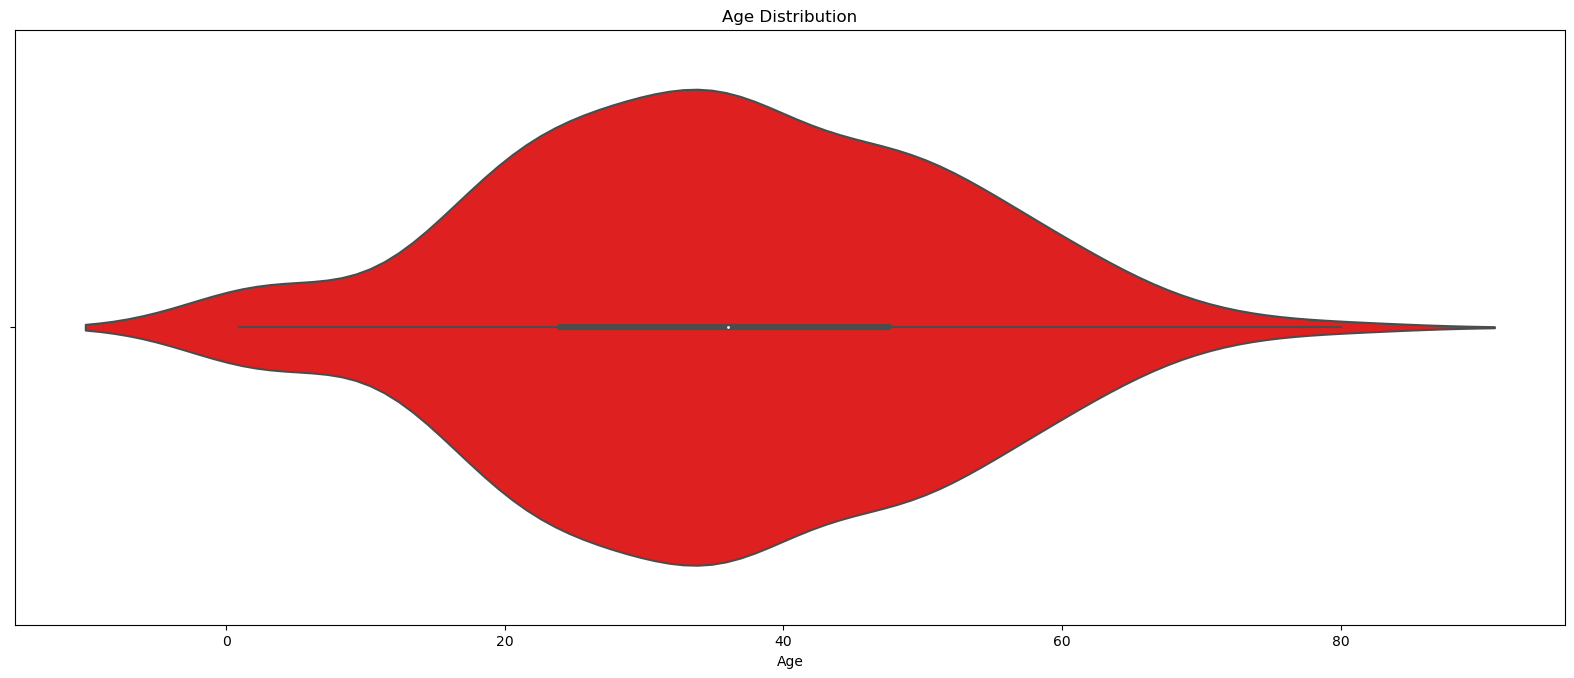

In [78]:
plt.subplots(1,2,figsize=(20,17))
plt.subplot(2,1,1)
plt.title("Age Distribution")
sns.violinplot(x='Age',data=df,color='red')

C:\Users\USER\AppData\Local\Temp\ipykernel_5088\1393113879.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


<AxesSubplot: title={'center': 'Fare'}, xlabel='Fare'>

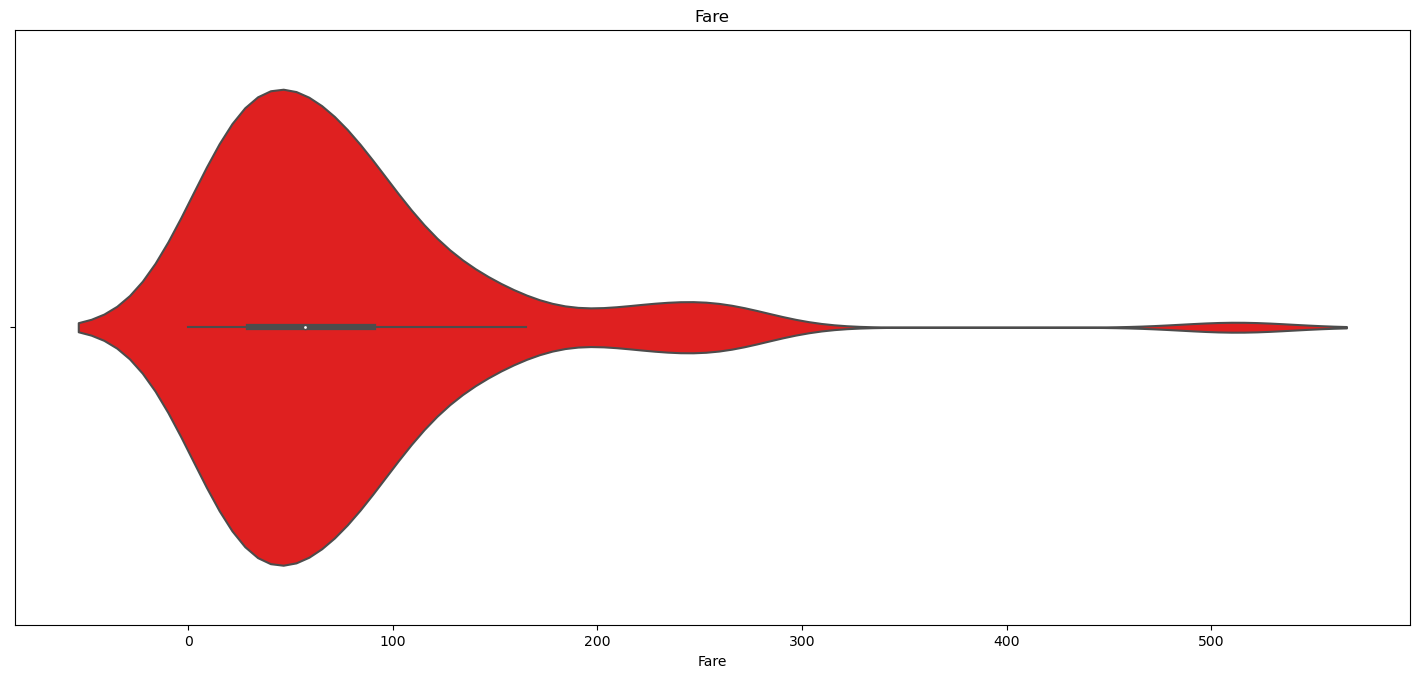

In [79]:
plt.subplots(1,2,figsize=(18,17))
plt.subplot(2,1,1)
plt.title("Fare")
sns.violinplot(x='Fare',data=df,color='red')



<AxesSubplot: title={'center': 'Parch'}, xlabel='Parch'>

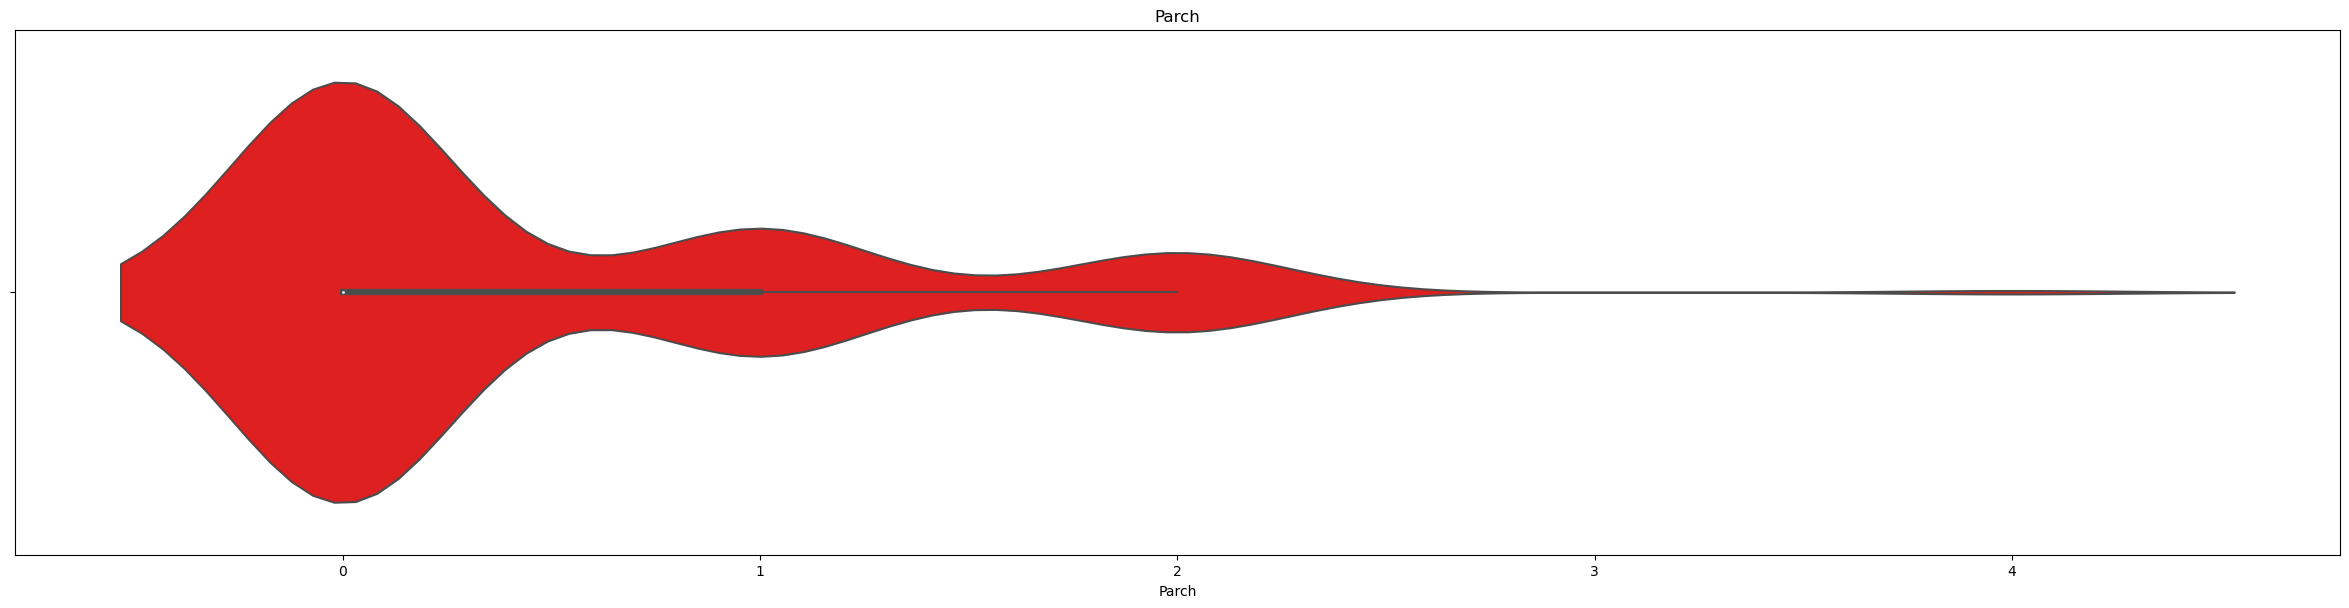

In [80]:
plt.subplot(2,1,2)
plt.title("Parch")
sns.violinplot(x='Parch',data=df,color='red')

<AxesSubplot: xlabel='Embarked', ylabel='Count'>

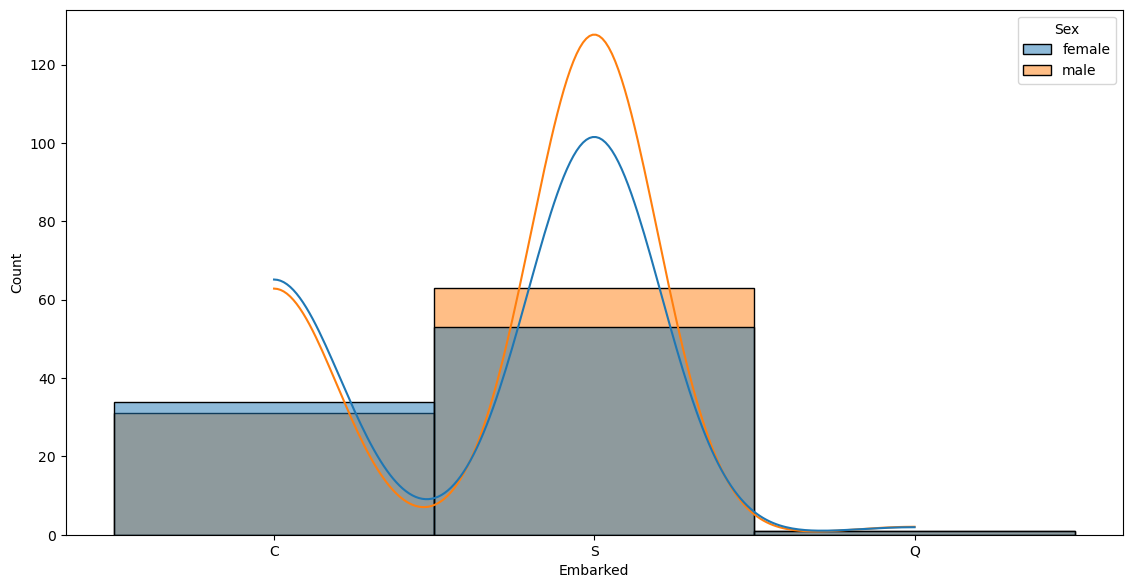

In [72]:
plt.subplot(2,2,1)
sns.histplot(data=df,x="Embarked",bins=30,hue="Sex",kde=True)


In [73]:
df.nunique()

Survived     2
Pclass       3
Sex          2
Age         63
SibSp        4
Parch        4
Fare        93
Embarked     3
dtype: int64

(-1.25, 1.25, -1.25, 1.25)

c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


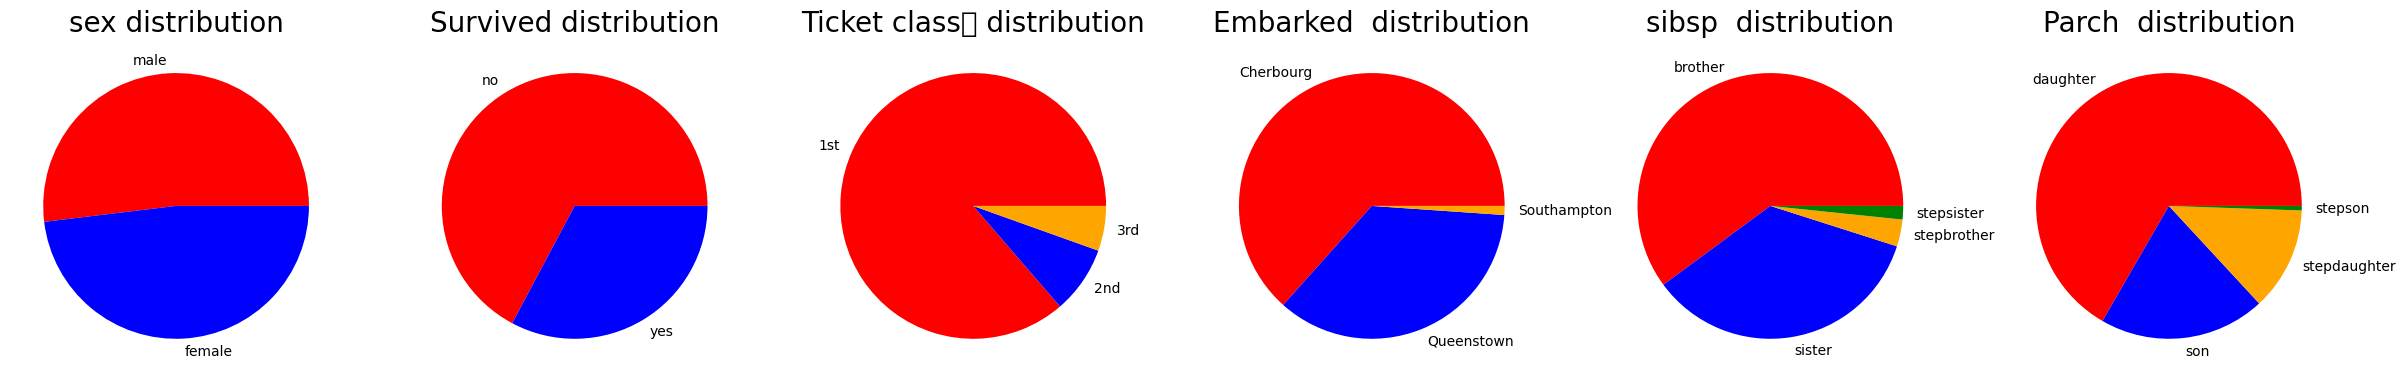

In [74]:
plt.rcParams['figure.figsize']=(30,15)

plt.subplot(1,6,1)
size=df["Sex"].value_counts()
labels='male', 'female'
color='red','blue'

plt.pie(x=size,labels=labels,colors=color)
plt.title("sex distribution",fontsize=20)
plt.axis('off')

plt.subplot(1,6,2)
size=df["Survived"].value_counts()
labels='no','yes'
color='red','blue'
plt.pie(x=size,labels=labels,colors=color)
plt.title("Survived distribution",fontsize=20)
plt.axis('off')


plt.subplot(1,6,3)
size=df["Pclass"].value_counts()
labels='1st', '2nd', '3rd'
color='red','blue','orange'
plt.pie(x=size,labels=labels,colors=color)
plt.title("Ticket class	 distribution",fontsize=20)
plt.axis('off')


plt.subplot(1,6,4)
size=df["Embarked"].value_counts()
labels=	'Cherbourg', 'Queenstown','Southampton'
color='red','blue','orange'
plt.pie(x=size,labels=labels,colors=color)
plt.title("Embarked  distribution",fontsize=20)
plt.axis('off')


plt.subplot(1,6,5)
size=df["SibSp"].value_counts()
labels='brother', 'sister', 'stepbrother', 'stepsister'
color='red','blue','orange','green'
plt.pie(x=size,labels=labels,colors=color)
plt.title("sibsp  distribution",fontsize=20)
plt.axis('off')



plt.subplot(1,6,6)
size=df["Parch"].value_counts()
labels='daughter', 'son', 'stepdaughter', 'stepson'
color='red','blue','orange','green'
plt.pie(x=size,labels=labels,colors=color)
plt.title("Parch  distribution",fontsize=20)
plt.axis('off')





P-values Test on mean

In [75]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200
